# Steel Plate Defect Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer, make_column_transformer

from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

In [2]:
pd.set_option('display.max_columns', 35)
plt.style.use("ggplot")

# Load the Dataset

In [6]:
train = pd.read_csv("Data/train.csv")
test = pd.read_csv("Data/test.csv")
original = pd.read_csv("Data/faults.csv")

In [4]:
print(f"The shape of training Dataset is: {train.shape}")
print(f"The shape of testing Dataset is: {test.shape}")

The shape of training Dataset is: (19219, 35)
The shape of testing Dataset is: (12814, 28)


In [9]:
original.shape

(1941, 34)

In [10]:
train = pd.concat([train, original])

In [11]:
train.shape

(21160, 35)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19219 entries, 0 to 19218
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     19219 non-null  int64  
 1   X_Minimum              19219 non-null  int64  
 2   X_Maximum              19219 non-null  int64  
 3   Y_Minimum              19219 non-null  int64  
 4   Y_Maximum              19219 non-null  int64  
 5   Pixels_Areas           19219 non-null  int64  
 6   X_Perimeter            19219 non-null  int64  
 7   Y_Perimeter            19219 non-null  int64  
 8   Sum_of_Luminosity      19219 non-null  int64  
 9   Minimum_of_Luminosity  19219 non-null  int64  
 10  Maximum_of_Luminosity  19219 non-null  int64  
 11  Length_of_Conveyer     19219 non-null  int64  
 12  TypeOfSteel_A300       19219 non-null  int64  
 13  TypeOfSteel_A400       19219 non-null  int64  
 14  Steel_Plate_Thickness  19219 non-null  int64  
 15  Ed

In [12]:
y = train[["Pastry","Z_Scratch","K_Scatch","Stains","Dirtiness","Bumps","Other_Faults"]].idxmax(axis=1)

In [13]:
y.replace(["Pastry","Z_Scratch","K_Scatch","Stains","Dirtiness","Bumps","Other_Faults"], [0, 1, 2, 3, 4, 5, 6], inplace=True)

In [14]:
X = train.drop(["Pastry","Z_Scratch","K_Scatch","Stains","Dirtiness","Bumps","Other_Faults", "id"], axis=1)

## Split the dataset into train and test set

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [16]:
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42, stratify=y_test)

We used strtify to keep the ratio equal over all the splits

## Let's First vizualize the data

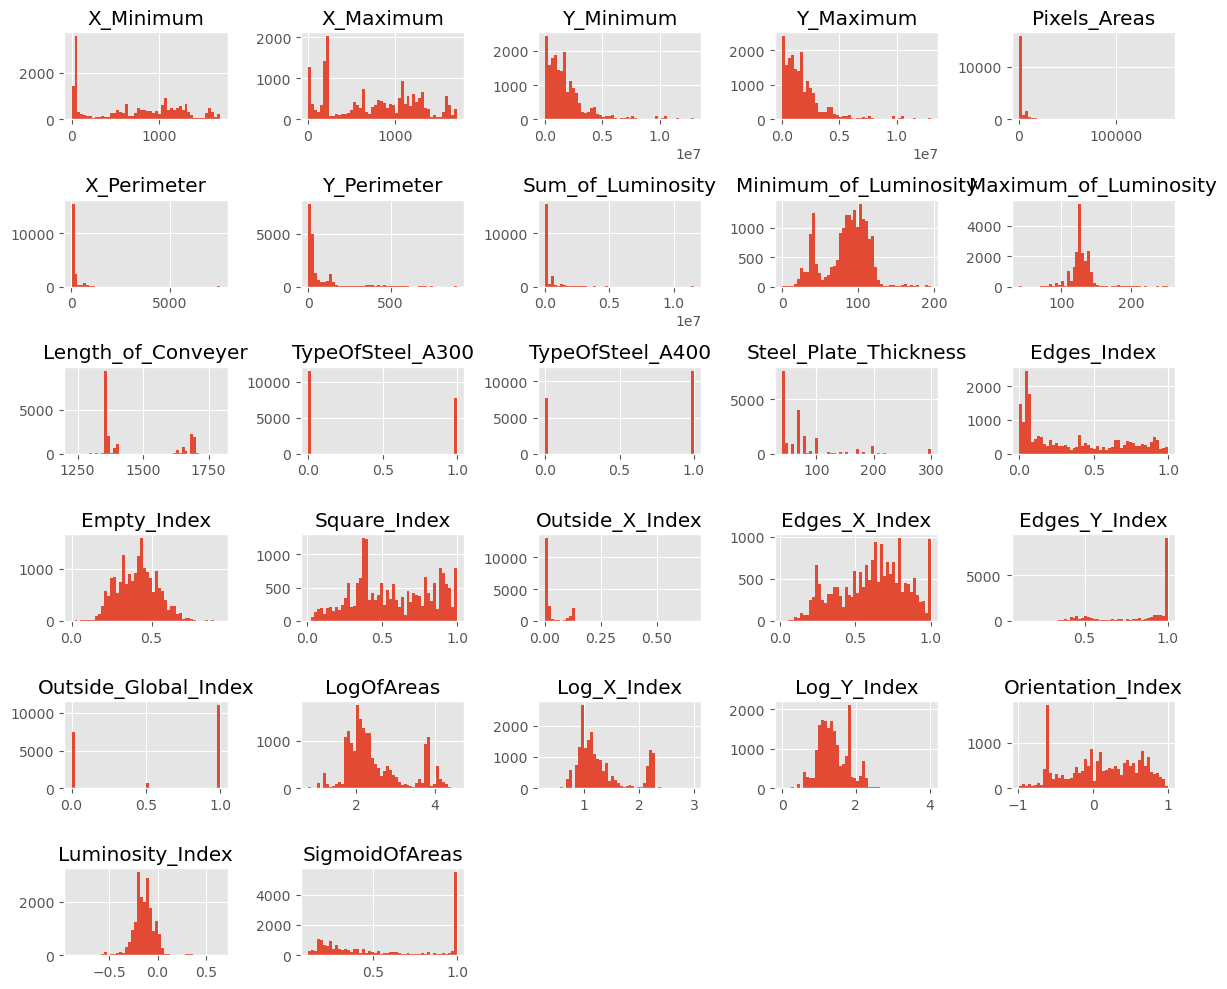

In [13]:
X.hist(grid=True, figsize=(12, 10), bins=50)
plt.tight_layout()

In [17]:
not_log = ["Minimum_of_Luminosity", 'Maximum_of_Luminosity', "TypeOfSteel_A300", "TypeOfSteel_A400", "Empty_Index", "Edges_X_Index", "Outside_Global_Index", 'LogOfAreas','Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index']
log_col = []
for col in X.columns:
    if col not in not_log:
        log_col.append(col)

In [14]:
X.columns

Index(['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas'],
      dtype='object')

In [14]:
corr = train.corr()

<Axes: >

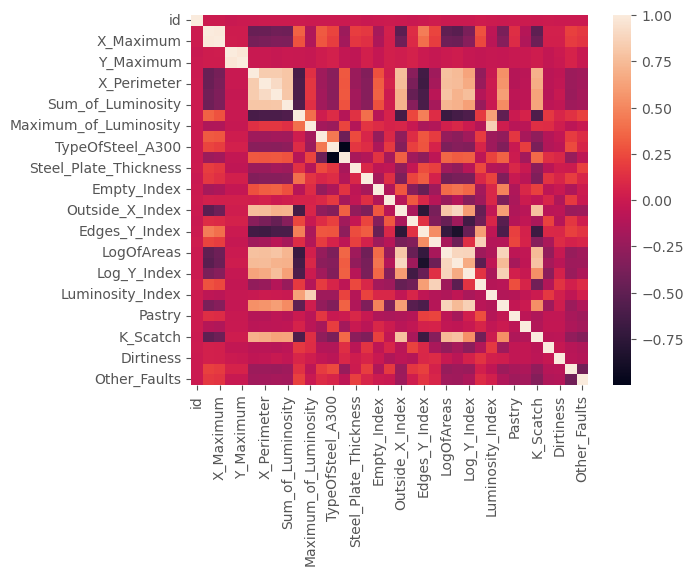

In [15]:
sns.heatmap(corr)

## LinearSVC

In [23]:
from sklearn.svm import LinearSVC

In [24]:
lin_svc = make_pipeline(
    StandardScaler(),
    LinearSVC(dual=True, C=0.1, random_state=42)
)

In [25]:
lin_svc.fit(X_train, y_train)

C:\Users\abhis\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=0.1, random_state=42))])

In [30]:
accuracy_score(lin_svc.predict(X_valid), y_valid)

0.5497745404092959

## SVC

In [112]:
from sklearn.svm import SVC

In [113]:
svc = make_pipeline(
    preprocessing,
    StandardScaler(),
    SVC(kernel="linear", C=0.1, random_state=42, probability=True, verbose=5)
)

In [74]:
svc.fit(X_train[:12000], y_train[:12000])

[LibSVM]

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('functiontransformer',
                                                  FunctionTransformer(feature_names_out='one-to-one',
                                                                      func=<function col_log at 0x00000286800865C0>),
                                                  Index(['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosit...
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas'],
      dtype='object'))])),
                ('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=0.1, kernel='linear', probability=True, random_state=42,
                     verbose=5))])

In [75]:
roc_auc_score(y_valid, svc.predict_proba(X_valid), multi_class="ovr")

0.8442575850946156

In [22]:
accuracy_score(svc.predict(X_valid), y_valid)

0.5511619840443982

## Logistic Regression

In [114]:
from sklearn.linear_model import LogisticRegression

In [115]:
logi_reg = make_pipeline(
    preprocessing,
    StandardScaler(),
    LogisticRegression(random_state=42, max_iter=100_000)
)

In [116]:
logi_reg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('functiontransformer',
                                                  FunctionTransformer(feature_names_out='one-to-one',
                                                                      func=<function col_log at 0x000001B46CCB4720>),
                                                  Index(['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosit...
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas'],
      dtype='object'))])),
                ('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(max_iter=100000, random_state=42))])

In [117]:
roc_auc_score(y_valid, logi_reg.predict_proba(X_valid), multi_class="ovr")

0.8515385914966002

In [61]:
accuracy_score(logi_reg.predict(X_valid), y_valid)

0.5508151231356226

## Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [21]:
def col_log(X):
    return np.log(X + 1)

In [22]:
preprocessing = make_column_transformer(
    (FunctionTransformer(col_log, feature_names_out="one-to-one"), X.columns)
)

In [120]:
rand_forest = make_pipeline(
    preprocessing,
    StandardScaler(),
    RandomForestClassifier(random_state=42)
)

In [121]:
rand_forest.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('functiontransformer',
                                                  FunctionTransformer(feature_names_out='one-to-one',
                                                                      func=<function col_log at 0x000001B46CCB4720>),
                                                  Index(['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosit...
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas'],
      dtype='object'))])),
                ('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [124]:
roc_auc_score(y_valid, rand_forest.predict_proba(X_valid), multi_class="ovo")

0.8799299848675672

In [123]:
accuracy_score(rand_forest.predict(X_valid), y_valid)

0.5825456836798992

## Let's use some powerful modules now

## LGBMClassifier

In [25]:
from lightgbm import LGBMClassifier

C:\Users\abhis\anaconda3\Lib\site-packages\dask\dataframe\_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(


In [26]:
from optuna.samplers import TPESampler
import optuna

In [82]:
# def objective(trial, X_train, y_train, X_test, y_test):
#     # Define parameters to be optimized for the LGBMClassifier
#     param = {
#         "objective": "multiclass",
#         "metric": "multi_logloss",
#         "verbosity": -1,
#         "boosting_type": "gbdt",
#         "random_state": 42,
#         "num_class": 7,
#         "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.05),
#         "n_estimators": trial.suggest_int("n_estimators", 400, 600),
#         "lambda_l1": trial.suggest_float("lambda_l1", 0.005, 0.015),
#         "lambda_l2": trial.suggest_float("lambda_l2", 0.02, 0.06),
#         "max_depth": trial.suggest_int("max_depth", 6, 14),
#         "colsample_bytree": trial.suggest_float("colsample_bytree", 0.3, 0.9),
#         "subsample": trial.suggest_float("subsample", 0.8, 1.0),
#         "min_child_samples": trial.suggest_int("min_child_samples", 10, 50),
#     }

#     # Create an instance of LGBMClassifier with the suggested parameters
#     lgbm_classifier = LGBMClassifier(**param)
    
#     # Fit the classifier on the training data
#     lgbm_classifier.fit(X_train, y_train)

#     # Evaluate the classifier on the test data
#     score = lgbm_classifier.score(X_test, y_test)

#     return score

# # Split the data into training and test sets
# # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust the test_size as needed

# # Set up the sampler for Optuna optimization
# sampler = optuna.samplers.TPESampler(seed=42)  # Using Tree-structured Parzen Estimator sampler for optimization

# # Create a study object for Optuna optimization
# study = optuna.create_study(direction="maximize", sampler=sampler)

# # Run the optimization process
# study.optimize(lambda trial: objective(trial, X_train, y_train, X_valid, y_valid), n_trials=50)

# # Get the best parameters after optimization
# best_params = study.best_params

# print('='*50)
# print(best_params)

In [27]:
lgbm_best_params = {
        "objective": "multiclass",
        "metric": "multi_logloss",
        "verbosity": -1,
        "boosting_type": "gbdt",
        "random_state": 42,
        "num_class": 7,
        'learning_rate': 0.01238372420962104,
        'n_estimators': 433,
        'lambda_l1': 0.007108100081137849,
        'lambda_l2': 0.03476239795083847,
        'max_depth': 11,
        'colsample_bytree': 0.5316680619799939,
        'subsample': 0.9221088703806487,
        'min_child_samples': 27
}

In [134]:
lgbm_clf1 = make_pipeline(
    # preprocessing,
    StandardScaler(),
    LGBMClassifier(**lgbm_best_params)
)

In [85]:
lgbm_clf.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('functiontransformer',
                                                  FunctionTransformer(feature_names_out='one-to-one',
                                                                      func=<function col_log at 0x0000020EF8E53100>),
                                                  Index(['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosit...
                ('standardscaler', StandardScaler()),
                ('lgbmclassifier',
                 LGBMClassifier(colsample_bytree=0.5316680619799939,
                                lambda_l1=0.007108100081137849,
                                lambda_l2=0.03476239795083847,
                                learning_rate=0.01238372420962104, max_depth=11,
                                metric='multi_logloss', min_child_samples=27,
                                n_estimators=433, num_class=7,
                                objective='multiclass', random_state=42,
                                subsample=0.9221088703806487, verbosity=-1))])

In [30]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [86]:
roc_auc_score(y_valid, lgbm_clf.predict_proba(X_valid), multi_class="ovo")

0.8855035734143051

## XGBoost Approach

In [31]:
from xgboost import XGBClassifier

In [45]:
sample_sub = pd.DataFrame(lgbm_clf.predict_proba(test), columns=["Pastry","Z_Scratch","K_Scatch","Stains","Dirtiness","Bumps","Other_Faults"], index=test.id)

In [49]:
sample_sub.reset_index(inplace=True)

In [42]:
sam = pd.read_csv("Data/sample_submission.csv")

In [50]:
sample_sub.head()

,id,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,19219,0.431113,0.002067,0.005075,0.000280,0.012102,0.177673,0.371689
1,19220,0.256061,0.013098,0.012148,0.000332,0.252946,0.123238,0.342178
2,19221,0.094706,0.048292,0.037893,0.000502,0.004115,0.248803,0.565688
3,19222,0.194169,0.002480,0.001728,0.000585,0.005574,0.380531,0.414932
4,19223,0.040460,0.003066,0.001804,0.000895,0.003985,0.607665,0.342125


In [43]:
sam.head()

,id,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,19219,0.5,0.5,0.5,0.5,0.5,0.5,0.5
1,19220,0.5,0.5,0.5,0.5,0.5,0.5,0.5
2,19221,0.5,0.5,0.5,0.5,0.5,0.5,0.5
3,19222,0.5,0.5,0.5,0.5,0.5,0.5,0.5
4,19223,0.5,0.5,0.5,0.5,0.5,0.5,0.5


In [53]:
sample_sub.to_csv("submission.csv")

In [163]:
sample_sub_vot = pd.DataFrame(vot.predict_proba(test.drop("id", axis=1)), columns=["Pastry","Z_Scratch","K_Scatch","Stains","Dirtiness","Bumps","Other_Faults"], index=test.id)

In [164]:
sample_sub_vot.head()

,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
id,,,,,,,
19219,0.449714,0.004960,0.006248,0.001371,0.030034,0.154633,0.353040
19220,0.262206,0.029869,0.011165,0.001902,0.173683,0.179441,0.341734
19221,0.071423,0.026734,0.034757,0.003164,0.006391,0.320499,0.537032
19222,0.164079,0.005644,0.002307,0.002403,0.007742,0.386137,0.431688
19223,0.038203,0.005992,0.002648,0.002526,0.008601,0.614946,0.327085


In [165]:
sample_sub_vot.to_csv("submission10.csv")

In [81]:
# def objective(trial):

#     n_estimators = trial.suggest_int("n_estimators", 100,1000)
#     # L1 regularization weight.
#     alpha = trial.suggest_float("alpha", 1e-8, 1.0, log=True)
#     # sampling ratio for training data.
#     subsample = trial.suggest_float("subsample", 0.2, 0.9)
#     # sampling according to each tree.
#     colsample_bytree = trial.suggest_float("colsample_bytree", 0.2, 0.9)
#     # maximum depth of the tree, signifies complexity of the tree.
#     max_depth = trial.suggest_int("max_depth", 3, 12)
#     # minimum child weight, larger the term more conservative the tree.
#     min_child_weight = trial.suggest_int("min_child_weight", 1, 3)
#     # learning rate
#     learning_rate =  trial.suggest_float("learning_rate", 1e-4, 1, log=True)
#     # defines how selective algorithm is.
#     gamma = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
    
    
       
#     xgb_clf = make_pipeline(
#         preprocessing,
#         StandardScaler(),
#         XGBClassifier(n_estimators = n_estimators,alpha=alpha,subsample=subsample,colsample_bytree=colsample_bytree,
#                           max_depth=max_depth,min_child_weight =min_child_weight,learning_rate=learning_rate,gamma=gamma,
#                           random_state =42, num_class=7)
#     )
    
#     # Fit the classifier on the training data
#     xgb_clf.fit(X_train, y_train)

#     # Evaluate the classifier on the test data
#     score = xgb_clf.score(X_valid, y_valid)        
    
#     return score


# sampler = TPESampler(seed=42) # create a seed for the sampler for reproducibility
# study = optuna.create_study(direction="maximize", sampler=sampler)
# study.optimize(objective, n_trials=50)

In [32]:
xgb_best_params = {'n_estimators': 731, 'alpha': 0.0006793607893934014, 'subsample': 0.6603945903198238, 'colsample_bytree': 0.5047951172166767, 'max_depth': 5, 'min_child_weight': 3, 'learning_rate': 0.014740587787224061, 'gamma': 0.0003650214503199033, "random_state": 42}

In [135]:
xgb_clf = make_pipeline(
    # preprocessing,
    StandardScaler(),
    XGBClassifier(**xgb_best_params)
)

In [78]:
xgb_clf.fit(X_train, y_train)

XGBClassifier(alpha=0.0006793607893934014, base_score=None, booster=None,
              callbacks=None, colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5047951172166767, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.0003650214503199033,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.014740587787224061,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=731, n_jobs=None,
              num_parallel_tree=None, ...)

In [79]:
accuracy_score(xgb_clf.predict(X_valid), y_valid)

0.5792577176552203

## ExtraTreeClassifier

In [34]:
from sklearn.ensemble import ExtraTreesClassifier, HistGradientBoostingClassifier

In [56]:
# def objective(trial):

#     n_estimators = trial.suggest_int("n_estimators", 100,1000)
#     max_feature = trial.suggest_int("max_feature", 2, 27)
#     max_depth = trial.suggest_int("max_depth", 3, 18)
       
#     ext_clf = ExtraTreesClassifier(n_estimators = n_estimators, max_features=max_feature, max_depth=max_depth)
    
#     # Fit the classifier on the training data
#     ext_clf.fit(X_train, y_train)

#     # Evaluate the classifier on the test data
#     score = ext_clf.score(X_valid, y_valid)        
    
#     return score


# sampler = TPESampler(seed=42) # create a seed for the sampler for reproducibility
# study = optuna.create_study(direction="maximize", sampler=sampler)
# study.optimize(objective, n_trials=100)

In [136]:
ext = make_pipeline(
    # preprocessing,
    StandardScaler(),
    ExtraTreesClassifier(n_estimators= 783, max_depth= 11, random_state=42, max_features=20)
)

In [54]:
ext.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('functiontransformer',
                                                  FunctionTransformer(feature_names_out='one-to-one',
                                                                      func=<function col_log at 0x0000020EF8E53100>),
                                                  Index(['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosit...
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas'],
      dtype='object'))])),
                ('standardscaler', StandardScaler()),
                ('extratreesclassifier',
                 ExtraTreesClassifier(max_depth=11, max_features=20,
                                      n_estimators=783, random_state=42))])

In [50]:
roc_auc_score(y_valid, ext.predict_proba(X_valid), multi_class="ovr")

0.8615020707408877

In [55]:
accuracy_score(ext.predict(X_valid), y_valid)

0.5691987513007284

## HistGradientBoostingClassifier

In [74]:
# def objective(trial):

#     # n_estimators = trial.suggest_int("n_estimators", 100,1000)
#     # max_feature = trial.suggest_int("max_feature", 2, 27)
#     max_depth = trial.suggest_int("max_depth", 3, 18)
#     max_bins = trial.suggest_int("max_bins", 10, 150)
#     learning_rate = trial.suggest_float("learning_rate", 0.0001, 10)
#     max_leaf_nodes = trial.suggest_int("max_leaf_nodes", 3, 30)
       
#     hist_clf = make_pipeline(
#         preprocessing,
#         StandardScaler(),
#         HistGradientBoostingClassifier(max_depth=max_depth, max_bins=max_bins, learning_rate=learning_rate, max_leaf_nodes=max_leaf_nodes, random_state=42)
#     )
    
#     # Fit the classifier on the training data
#     hist_clf.fit(X_train, y_train)

#     # Evaluate the classifier on the test data
#     score = hist_clf.score(X_valid, y_valid)        
    
#     return score


# sampler = TPESampler(seed=42) # create a seed for the sampler for reproducibility
# study = optuna.create_study(direction="maximize", sampler=sampler)
# study.optimize(objective, n_trials=100)

In [36]:
hist_best_params = {'max_depth': 4, 'max_bins': 83, 'learning_rate': 0.03838876793696897, 'max_leaf_nodes': 29, "random_state":42}

In [137]:
hist_clf = make_pipeline(
    # preprocessing,
    StandardScaler(),
    HistGradientBoostingClassifier()
)

In [88]:
hist_clf.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('functiontransformer',
                                                  FunctionTransformer(feature_names_out='one-to-one',
                                                                      func=<function col_log at 0x000001B46CCB4720>),
                                                  Index(['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosit...
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas'],
      dtype='object'))])),
                ('standardscaler', StandardScaler()),
                ('histgradientboostingclassifier',
                 HistGradientBoostingClassifier())])

In [89]:
accuracy_score(hist_clf.predict(X_valid), y_valid)

0.594833018273472

In [90]:
roc_auc_score(y_valid, hist_clf.predict_proba(X_valid), multi_class="ovo")

0.8911195030487248

## Taking some parameters from others notebooks

### LGBMClassifier 2

In [144]:
lgbm_optuna_params1 = {
    'n_estimators': 1834,
    'max_depth': 10,
    'learning_rate': 0.005451511795931252,
    'min_data_in_leaf': 4,
    'subsample': 0.5633978668136881,
    'max_bin': 110,
    'feature_fraction': 0.17583040106894807,
    "objective": "multiclass",
    "metric": "multi_logloss",
    "verbosity": -1,
    "boosting_type": "gbdt",
    "random_state": 42,
    "num_class": 7,
}
lgbm_clf2 = make_pipeline(
    # preprocessing,
    StandardScaler(),
    LGBMClassifier(**lgbm_optuna_params1)
)

In [79]:
lgbm_clf2.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('functiontransformer',
                                                  FunctionTransformer(feature_names_out='one-to-one',
                                                                      func=<function col_log at 0x000001B46CCB4720>),
                                                  Index(['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosit...
       'SigmoidOfAreas'],
      dtype='object'))])),
                ('standardscaler', StandardScaler()),
                ('lgbmclassifier',
                 LGBMClassifier(feature_fraction=0.17583040106894807,
                                learning_rate=0.005451511795931252, max_bin=110,
                                max_depth=10, metric='multi_logloss',
                                min_data_in_leaf=4, n_estimators=1834,
                                num_class=7, objective='multiclass',
                                random_state=42, subsample=0.5633978668136881,
                                verbosity=-1))])

In [80]:
roc_auc_score(y_valid, lgbm_clf2.predict_proba(X_valid), multi_class="ovo")

0.8958881834376313

### LGBMClassifier 3

In [138]:
lgbm_optuna_params3 = {'n_estimators': 627,
                              'objective': 'multiclass',
                              'metric': 'multi_logloss',
                              'verbosity': -1,
                              'boosting_type': 'gbdt',
                              'random_state': 42,
                              'learning_rate': 0.01,
                              'feature_pre_filter': False,
                              'lambda_l1': 9.131381342494084e-08,
                              'lambda_l2': 3.690335595327202e-05,
                              'num_leaves': 31, 
                              'feature_fraction': 0.4, 
                              'bagging_fraction': 0.630575690135632,
                              'bagging_freq': 5, 
                              'min_child_samples': 20}

lgbm_clf3 = make_pipeline(
    # preprocessing,
    StandardScaler(),
    LGBMClassifier(**lgbm_optuna_params3)
)

In [82]:
lgbm_clf3.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('functiontransformer',
                                                  FunctionTransformer(feature_names_out='one-to-one',
                                                                      func=<function col_log at 0x000001B46CCB4720>),
                                                  Index(['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosit...
      dtype='object'))])),
                ('standardscaler', StandardScaler()),
                ('lgbmclassifier',
                 LGBMClassifier(bagging_fraction=0.630575690135632,
                                bagging_freq=5, feature_fraction=0.4,
                                feature_pre_filter=False,
                                lambda_l1=9.131381342494084e-08,
                                lambda_l2=3.690335595327202e-05,
                                learning_rate=0.01, metric='multi_logloss',
                                n_estimators=627, objective='multiclass',
                                random_state=42, verbosity=-1))])

In [83]:
roc_auc_score(y_valid, lgbm_clf3.predict_proba(X_valid), multi_class="ovo")

0.8965984498067818

### XGBClassifier 2

In [139]:
xgb_optuna_params2 = {'n_estimators': 999,
                            'alpha': 0.002084420690864832,
                            'subsample': 0.7099725497433862,
                            'colsample_bytree': 0.2016160543417863,
                            'max_depth': 6, 
                            'min_child_weight': 3, 
                            'learning_rate': 0.01182912450871734,
                            'gamma': 0.00040448964009199537,
                             "num_class": 7}

xgb_clf2 = make_pipeline(
    # preprocessing,
    StandardScaler(),
    XGBClassifier(**xgb_optuna_params2, random_state=42)
)

In [46]:
xgb_clf2.fit(X_train, y_train)

XGBClassifier(alpha=0.002084420690864832, base_score=None, booster=None,
              callbacks=None, colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.2016160543417863, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None,
              gamma=0.00040448964009199537, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01182912450871734, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=999, n_jobs=None, num_class=7, ...)

In [48]:
roc_auc_score(y_valid, xgb_clf2.predict_proba(X_valid), multi_class="ovo")

0.8956036438110866

### Catboost Calssifier 

In [49]:
from catboost import CatBoostClassifier

In [140]:
catboost_optuna_params = {'iterations': 491,
                                 'colsample_bylevel': 0.354727034710189,
                                 'learning_rate': 0.009334020337675848,
                                 'random_strength': 0.32487468592613716,
                                 'depth': 10,
                                 'l2_leaf_reg': 4,
                                 'boosting_type': 'Plain',
                                 'bootstrap_type': 'Bernoulli',
                                 'subsample': 0.773511170987769}

catboost_clf = make_pipeline(
    # preprocessing,
    StandardScaler(),
    CatBoostClassifier(**catboost_optuna_params, random_state=42, logging_level='Silent')
)

In [52]:
catboost_clf.fit(X_train, y_train)

In [53]:
roc_auc_score(y_valid, catboost_clf.predict_proba(X_valid), multi_class="ovo")

0.886161234857625

## Binding Together

In [56]:
from sklearn.ensemble import VotingClassifier, StackingClassifier

In [160]:
vot = VotingClassifier(
    estimators=[
        ("lgbm", lgbm_clf1),
        ("xgb", xgb_clf),
        ("ext", ext),
        ("hist", hist_clf),
        ("lgbm2", lgbm_clf2),
        ("lgbm3", lgbm_clf3),
        ("xgb2", xgb_clf2),
        ("catboost", catboost_clf),
        # ("rand_forest", rand_forest),
        # ("logi_reg", logi_reg)
    ], voting="soft"
)

In [161]:
vot.fit(X_train, y_train)

VotingClassifier(estimators=[('lgbm',
                              Pipeline(steps=[('standardscaler',
                                               StandardScaler()),
                                              ('lgbmclassifier',
                                               LGBMClassifier(colsample_bytree=0.5316680619799939,
                                                              lambda_l1=0.007108100081137849,
                                                              lambda_l2=0.03476239795083847,
                                                              learning_rate=0.01238372420962104,
                                                              max_depth=11,
                                                              metric='multi_logloss',
                                                              min_child_samples=27,
                                                              n_estimators=433,
                                                              num_class=7,
                                                              objective='...
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=None,
                                                             max_depth=6,
                                                             max_leaves=None,
                                                             min_child_weight=3,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=999,
                                                             n_jobs=None,
                                                             num_class=7, ...))])),
                             ('catboost',
                              Pipeline(steps=[('standardscaler',
                                               StandardScaler()),
                                              ('catboostclassifier',
                                               <catboost.core.CatBoostClassifier object at 0x000001B4048A76D0>)]))],
                 voting='soft')

In [162]:
roc_auc_score(y_test, vot.predict_proba(X_test), multi_class='ovo')

0.8970808809824418

In [111]:
from sklearn.linear_model import LinearRegression, LogisticRegression

In [119]:
sta = StackingClassifier(
    estimators=[
        ("lgbm", lgbm_clf),
        ("xgb", xgb_clf),
        ("ext", ext),
        ("hist", hist_clf)
    ], final_estimator=LogisticRegression()
)

In [120]:
sta.fit(X_train, y_train)

In [116]:
roc_auc_score(y_test, sta.predict_proba(X_test), multi_class='ovo')

0.8804482547056962